In [86]:
import glob,os
import sys
import math                   
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imwrite, TiffFile
import scipy.ndimage
import scipy.signal as sig
import collections
import pandas as pd

#img[channels][frames][slices][row][column]

#import the image
image_path = '/Users/domchom/Documents/GitHub/Dom_python_scripts/wound_close_quant/MAX_Exp049_dTom-rGBD_GFP-wGBD_control_cellA-001_raw.tif'
img = imread(image_path)

# standardize image dimensions
with TiffFile(image_path) as tif_file:
    metadata = tif_file.imagej_metadata
num_channels = metadata.get('channels', 1)
num_slices = metadata.get('slices', 1)
num_frames = metadata.get('frames', 1)
img = img.reshape(num_channels, num_frames, num_slices, img.shape[-2], img.shape[-1])

#user inputs
num_of_lines = 48 #how many line scans per frame
line_length = 150 #choose you line length
num = 150 #number of data points per line


#finding the center of mass
center_x_coords = []
center_y_coords = []

for n in range (2):
    for i in range(51):
        cen = scipy.ndimage.measurements.center_of_mass(img[n][i][0])
        center_x_coords.append(cen[0])
        center_y_coords.append(cen[1])

mean_x_center = sum(center_x_coords) / len(center_x_coords)
mean_y_center = sum(center_y_coords) / len(center_y_coords)

center = [mean_x_center, mean_y_center]

#calculating all the lines needed for the linescan later
line_coord_list = [] #list to fill with lines
degree_diff = 360/num_of_lines #calc difference in degrees betweeen the lines
radian_diff = math.radians(degree_diff)

m = 0
i = 0
for line in range(num_of_lines):
    if i == 0: #first line
        x0, y0 = center[0], center[1] 
        x_length = (line_length * math.sin(i))
        x1 = center[0] + x_length
        y_length = math.sqrt((line_length**2) - (x_length**2))
        y1 = center[1] + y_length

        x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

        coords = [x,y]
        line_coord_list.append(coords)

        i += radian_diff
        m += 1
    else:
        if m < num_of_lines / 4:
            x0, y0 = center[0], center[1] 
            x_length = (line_length * math.sin(i))
            x1 = center[0] + x_length 
            y_length = math.sqrt((line_length**2) - (x_length**2))
            y1 = center[1] + y_length

            x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
            coords = [x,y]
            line_coord_list.append(coords)
        elif m < num_of_lines / 2:
            x0, y0 = center[0], center[1] 
            x_length = (line_length * math.sin(i))
            x1 = center[0] + x_length
            y_length = math.sqrt((line_length**2) - (x_length**2))
            y1 = center[1] - y_length

            x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
            coords = [x,y]
            line_coord_list.append(coords)
        elif m < ((num_of_lines / 2) + (num_of_lines / 4)):
            x0, y0 = center[0], center[1] 
            x_length = (line_length * math.sin(i + radian_diff))
            x1 = center[0] + x_length 
            y_length = math.sqrt((line_length**2) - (x_length**2))
            y1 = center[1] + y_length

            x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
            coords = [x,y]
            line_coord_list.append(coords)
        else:
            x0, y0 = center[0], center[1] 
            x_length = (line_length * math.sin(i + radian_diff))
            x1 = center[0] + x_length 
            y_length = math.sqrt((line_length**2) - (x_length**2))
            y1 = center[1] - y_length

            x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
            coords = [x,y]
            line_coord_list.append(coords)
 
        i += radian_diff
        m += 1


    

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [87]:
frames_list = [] # store all the signals for every frame

c = 0 #which channel to start with
for channel in img: #iterate over the channels
    print(f'channel {c+1}')
    f=0 #which frame to start with
    for frame in channel: #iterate over the frames
        signals_list = [] #lost to store the signal for each line for the frame
        print(f'frame {f+1}')
        for each_line in line_coord_list: #create each line for each frame
            x, y = each_line[0], each_line[1]
            x0, x1 = x[0], x[-1]
            y0, y1= y[0], y[-1]

            # Extract the values along the line, using cubic interpolation
            signal = scipy.ndimage.map_coordinates(img[c][f][0], np.vstack((x,y)))
            signal = sig.savgol_filter(signal, window_length = 30, polyorder = 2) #to smooth the line
            signals_list.append(signal)

            #Plot
            '''fig, axes = plt.subplots(nrows=2)
            axes[0].imshow(img[c][f][0])
            axes[0].plot([x0, x1], [y0, y1], 'r-')
            axes[0].axis('image')

            axes[1].plot(signal)

            plt.show()'''
        frames_list.append(signals_list)
        f+=1
    c += 1

channel 1
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51
channel 2
frame 1
frame 2
frame 3
frame 4
frame 5
frame 6
frame 7
frame 8
frame 9
frame 10
frame 11
frame 12
frame 13
frame 14
frame 15
frame 16
frame 17
frame 18
frame 19
frame 20
frame 21
frame 22
frame 23
frame 24
frame 25
frame 26
frame 27
frame 28
frame 29
frame 30
frame 31
frame 32
frame 33
frame 34
frame 35
frame 36
frame 37
frame 38
frame 39
frame 40
frame 41
frame 42
frame 43
frame 44
frame 45
frame 46
frame 47
frame 48
frame 49
frame 50
frame 51


149


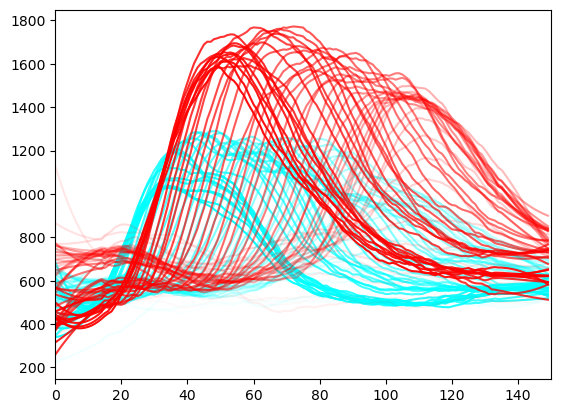

In [88]:
frames_array = np.array(frames_list)

channel1 = frames_array[::2]
channel2 = frames_array[1::2]

mean_values_Ch1 = []

i = 0
for frame in channel1:
    n = 0
    pixel_avg_per_frame = []
    for x in range(num):
        pixel_avg_per_frame.append(frame[:,n].mean())
        n+=1
    mean_values_Ch1.append(pixel_avg_per_frame)
    i+=1

mean_values_Ch1 = np.array(mean_values_Ch1)

mean_values_Ch2 = []

i = 0
for frame in channel2:
    n = 0
    pixel_avg_per_frame = []
    for x in range(num):
        pixel_avg_per_frame.append(frame[:,n].mean())
        n+=1
    mean_values_Ch2.append(pixel_avg_per_frame)
    i+=1

mean_values_Ch2 = np.array(mean_values_Ch2)

fig, axes = plt.subplots(nrows=1)
axes.set_xlim([0, line_length])

n=0
for signal in mean_values_Ch1:
    #signal = sig.savgol_filter(signal, window_length = 30, polyorder = 2) #to smooth the line
    plt.plot(signal, color='cyan', alpha= n)
    n+=.019

n = 0
for signal in mean_values_Ch2:
    #signal = sig.savgol_filter(signal, window_length = 30, polyorder = 2) #to smooth the line
    plt.plot(signal, color='red', alpha= n)
    n+=.019

print(x)
plt.show()

In [89]:
#normalize the data

norm_mean_values_Ch1 = []

for signal in mean_values_Ch1:
    signal = sig.savgol_filter(signal, window_length = 30, polyorder = 2) #to smooth the line
    norm_values = []
    for pixel in signal:
        pixel_norm = (pixel/np.max(signal))
        norm_values.append(pixel_norm)
    norm_mean_values_Ch1.append(norm_values)


norm_mean_values_Ch2 = []

for signal in mean_values_Ch2:
    signal = sig.savgol_filter(signal, window_length = 30, polyorder = 2) #to smooth the line
    norm_values = []
    for pixel in signal:
        pixel_norm = (pixel/np.max(signal))
        norm_values.append(pixel_norm)
    norm_mean_values_Ch2.append(norm_values)

In [90]:
import imageio
import moviepy.editor as mp

i = 0
for signal in norm_mean_values_Ch1:
    fig, axes = plt.subplots(nrows=1) 
    axes.set_ylim([0, 1])
    plt.plot(signal, color='cyan')
    plt.plot(norm_mean_values_Ch2[i], color='red')
    plt.savefig(f'line-{i}.png')
    plt.close()
    i+=1


with imageio.get_writer('line.gif', mode='i') as writer:
    for i in range(len(norm_mean_values_Ch1)):
        image = imageio.imread(f'line-{i}.png')
        writer.append_data(image)

clip = mp.VideoFileClip("line.gif")
clip.write_videofile("line.mp4")

Moviepy - Building video line.mp4.
Moviepy - Writing video line.mp4



Moviepy - Done !
Moviepy - video ready line.mp4
